In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mrcfile
import torch

from tomoSegmentPipeline.utils.common import read_array, write_array
from tomoSegmentPipeline.utils import setup
from cryoS2Sdrop.dataloader import singleCET_dataset, singleCET_FourierDataset

from cryoS2Sdrop.analyze import *
from cryoS2Sdrop.deconvolution import tom_deconv_tomo

import tomopy.sim.project as proj
from tomopy.recon.algorithm import recon
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

PARENT_PATH = setup.PARENT_PATH

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 80

def standardize(X):
    mean = X.mean()
    std = X.std()
    new_X = (X - mean) / std

    return new_X

def clip(X, low=0.005, high=0.995):
    # works with tensors =)
    return np.clip(X, np.quantile(X, low), np.quantile(X, high))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
/home/jeronimo/Documents/haicu_vicb_submit01/data/data/S2SDenoising/dummy_tomograms/tomo04_cryoCAREDummy.mrc

'/home/ubuntu/Thesis/'

In [8]:
p = os.path.join(PARENT_PATH, 'data/S2SDenoising/dummy_tomograms/tomo04_cryoCAREDummy.mrc') 
denoised = read_array(p)
denoised = scale(denoised)

In [7]:
p = os.path.join(PARENT_PATH, 'data/S2SDenoising/dummy_tomograms/tomo04_dummy.mrc') 
raw = read_array(p)
raw = scale(raw)

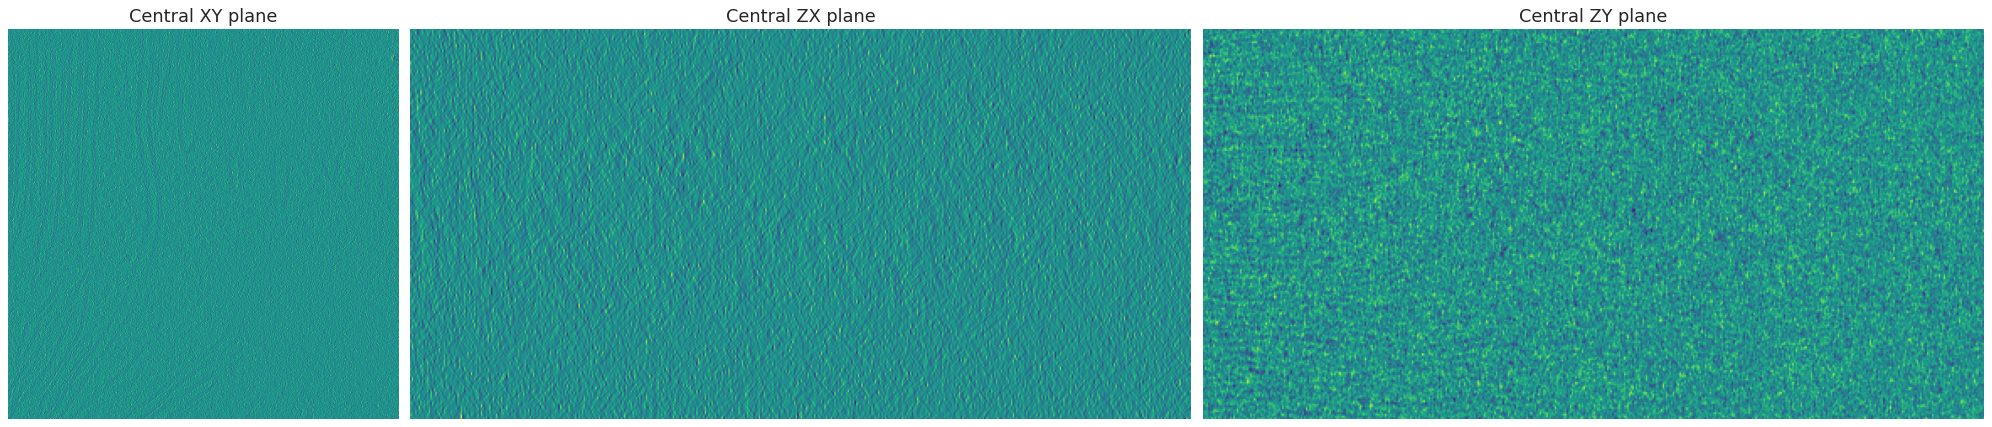

(<Figure size 2000x800 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Central XY plane'}>,
        <AxesSubplot:title={'center':'Central ZX plane'}>,
        <AxesSubplot:title={'center':'Central ZY plane'}>], dtype=object))

In [11]:
plot_centralSlices(raw, True)

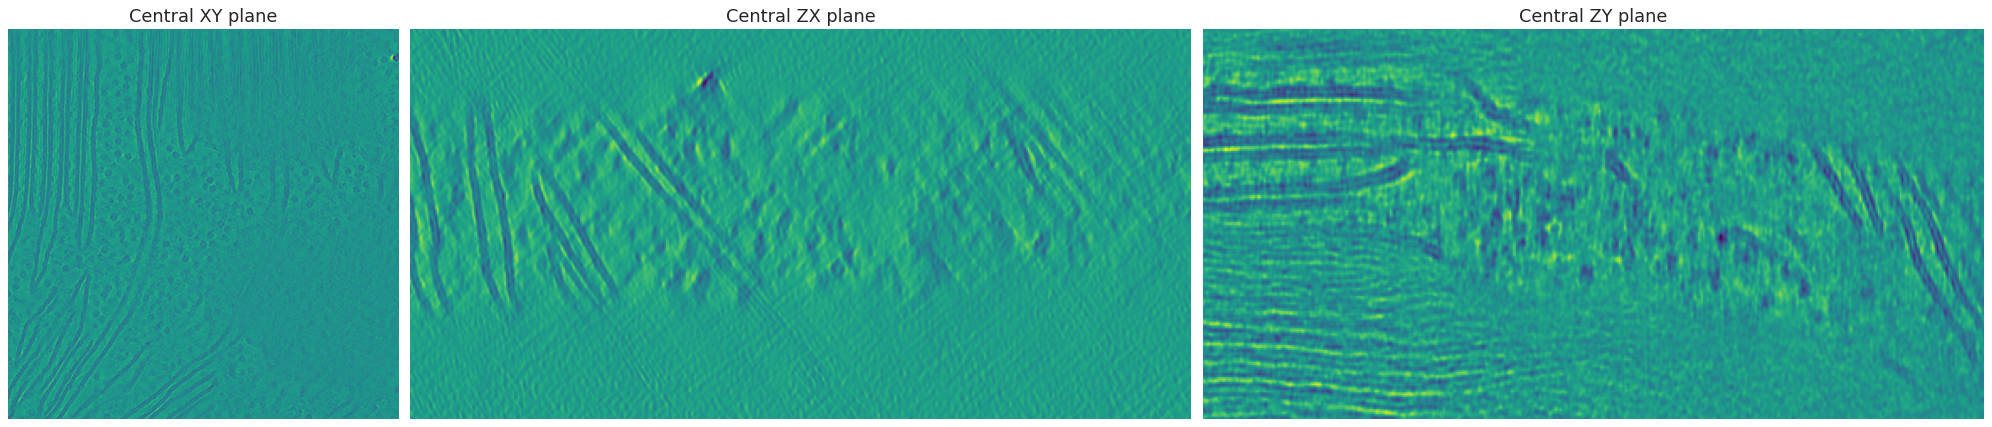

(<Figure size 2000x800 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Central XY plane'}>,
        <AxesSubplot:title={'center':'Central ZX plane'}>,
        <AxesSubplot:title={'center':'Central ZY plane'}>], dtype=object))

In [12]:
plot_centralSlices(denoised, True)

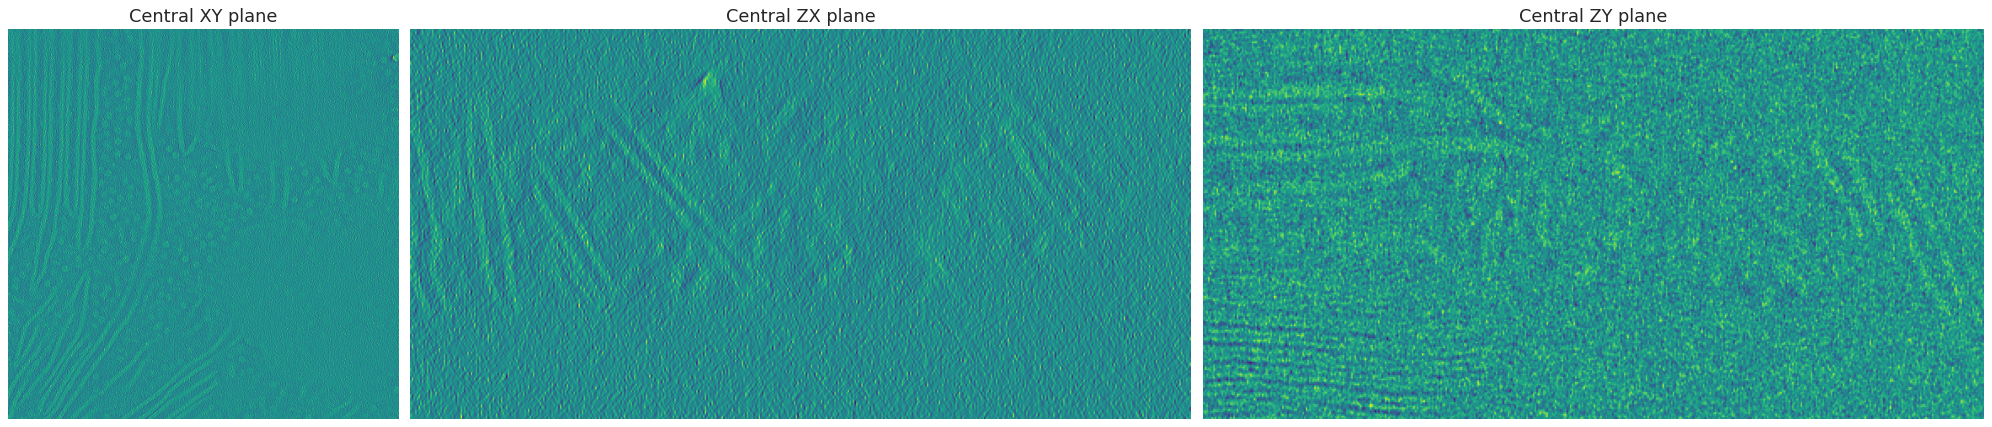

(<Figure size 2000x800 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Central XY plane'}>,
        <AxesSubplot:title={'center':'Central ZX plane'}>,
        <AxesSubplot:title={'center':'Central ZY plane'}>], dtype=object))

In [13]:
plot_centralSlices(raw-denoised, True)

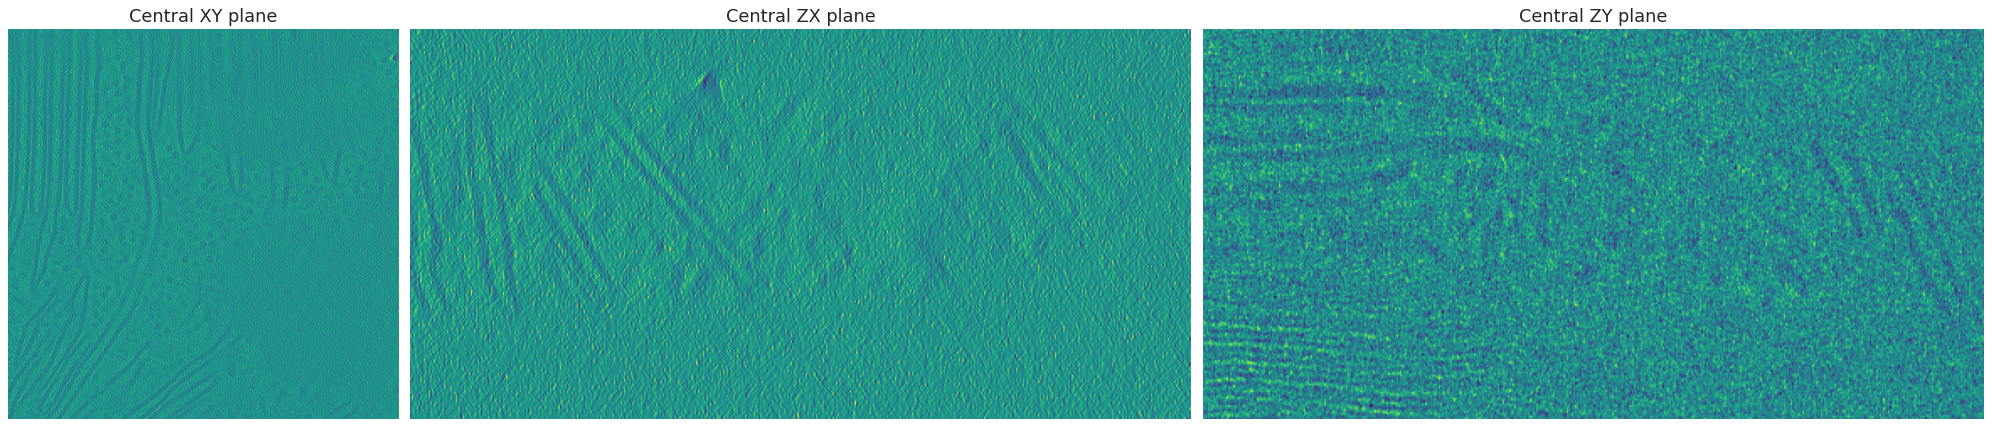

(<Figure size 2000x800 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Central XY plane'}>,
        <AxesSubplot:title={'center':'Central ZX plane'}>,
        <AxesSubplot:title={'center':'Central ZY plane'}>], dtype=object))

In [14]:
plot_centralSlices(denoised-raw, True)